In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [20]:
#taking electronics reviews 
df= pd.read_csv(r'C:\Users\Kashi\Downloads\Amazon electronics.txt', error_bad_lines=False)


b'Skipping line 6: expected 1 fields, saw 14\n'


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [22]:
df = [x.strip() for x in df.x] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False


In [23]:
text = ' '.join(df)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [24]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of', 'data', 'and', 'transactions', 'much', 'better', 'Terrific', 'sense', 'of', 'possession', 'prideBad', 'News', 'Problems', 'will', 'be', 'there', 'if', 'you', 'are', 'switching', 'from', 'windows', 'based', 'system', 'very', 'less', 'space', 'in', 'hard', 'disk', 'no', 'CD', 'drive', 'inability', 'to', 'transfer', 'data', 'from', 'Mac', 'to', 'your', 'existing', 'external', 'hard', 'disc', 'unless', 'you', 'format', 'it', 'apps', 'are', 'mostly', 'paid', 'and', 're', 'unreasonably', 'expensive', 'no', 'free', 'apps', 'which'

In [28]:
from nltk.corpus import stopwords
#nltk.download('punkt')
nltk.download('stopwords')
#stopwords.words
my_stop_words = stopwords.words('english')
print(my_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kashi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
#Remove stopwords
my_stop_words.append('the')
my_stop_words.append('Its')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:20])

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood']


In [30]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])


['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good']


In [32]:
nlp = spacy.load('en_core_web_sm') 
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data transactions


In [33]:
lemmas = [word.lemma_ for word in doc]
print(lemmas)

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'get', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopgood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptop', 'crash', 'become', 'defunct', '610', 'year', 'antivirus', 'require', 'security', 'datum', 'transaction', 'much', 'well', 'terrific', 'sense', 'possession', 'prideBad', 'News', 'problem', 'switch', 'window', 'base', 'system', 'less', 'space', 'hard', 'disk', 'cd', 'drive', 'inability', 'transfer', 'datum', 'Mac', 'exist', 'external', 'hard', 'disc', 'unless', 'format', 'app', 'mostly', 'pay', 'unreasonably', 'expensive', 'free', 'app', 'available', 'otherwise', 'google', 'play', 'store', 'even', 'angry', 'bird', 'cost', 'r', '400', 'printer', 'compatible', 'eg', 'economical', 'mfd', 'laser', 'printer', 'RICOH', 'SP', '111', 'can', 'not', 'use', 'huge', 'compatibility', 'issue', 'Pages', '

In [34]:
afinn = pd.read_csv(r'C:\Users\Kashi\Downloads\Afinn.csv', sep=',', encoding='latin-1')

In [36]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unles

In [54]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [38]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            print(word, sentiment_lexicon.get(word.lemma_, 0))
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.
It 0
's 0
amazing 4
..... 0
battery 0
last 0
around 0
10 0
-12 0
hrs 0
..... 0
best 3
laptop 0
for 0
students 0
and 0
coders 0
Finally 0
a 0
MacBook 0
possession 0
. 0
Got it in 50k in Diwali sale.
Got 0
it 0
in 0
50k 0
in 0
Diwali 0
sale 0
. 0
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Technically 0
good 3
laptop 0
. 0
Good 3
News.luxury 0
product 0
, 0
niche 0
technology 0
, 0
good 3
battery 0
life 0
, 0
reliable 0
machine 0
( 0
other 0
laptops 0
crash -2
and 0
become 0
defunct 0
in 0
6 0
- 0
10 0
years 0
) 0
, 0
no -1
anti -1
- 0
virus 0
required 0
, 0
security 0
of 0
data 0
and 0
transactions 0
much 0
better 0
. 0
Terrific sense of possession & pride.Bad News.
Terrific 4
sense 0
o

Request seller , Amazon or apple to take full responsibility.
Request 0
seller 0
, 0
Amazon 0
or 0
apple 0
to 0
take 0
full 0
responsibility 0
. 0
Hi, Think thousand time before buying.
Hi 0
, 0
Think 0
thousand 0
time 0
before 0
buying 0
. 0
One calm night i was cuddling in jaipuri blanket while enjoying youtube on this expensive machine.
One 0
calm 2
night 0
i 0
was 0
cuddling 0
in 0
jaipuri 0
blanket 0
while 0
enjoying 2
youtube 0
on 0
this 0
expensive 0
machine 0
. 0
Cold night and little excitement created electrostatic charge which spike though spaceBar button.
Cold 0
night 0
and 0
little 0
excitement 3
created 0
electrostatic 0
charge 0
which 0
spike 0
though 0
spaceBar 0
button 0
. 0
that's how it went to deep sleep forever.
that 0
's 0
how 0
it 0
went 0
to 0
deep 0
sleep 0
forever 0
. 0
Nothing can bring it back and i am in no mood in spending another fortune on this machine.
Nothing 0
can 0
bring 0
it 0
back 0
and 0
i 0
am 0
in 0
no -1
mood 0
in 0
spending 0
another 0
fortune

Go for it if you are in the criteria I explained above!
Go 0
for 0
it 0
if 0
you 0
are 0
in 0
the 0
criteria 0
I 0
explained 0
above 0
! 0
For hard-core video editing I would recommend atleast an iMac 4k or MacBook Pro Base Model because of its cooling Fan structure, Better Graphics and CPU!
For 0
hard -1
- 0
core 0
video 0
editing 0
I 0
would 0
recommend 2
atleast 0
an 0
iMac 0
4k 0
or 0
MacBook 0
Pro 0
Base 0
Model 0
because 0
of 0
its 0
cooling 1
Fan 0
structure 0
, 0
Better 0
Graphics 0
and 0
CPU 0
! 0
This Air is enough to edit 4k60fps videos but will slow down a bit in 5k60fps!
This 0
Air 0
is 0
enough 0
to 0
edit 0
4k60fps 0
videos 0
but 0
will 0
slow 0
down 0
a 0
bit 0
in 0
5k60fps 0
! 0
While exporting the 4k60fps video the CPU and GPU went up to 104 degrees, this is the reason i am going to apple support!
While 0
exporting 0
the 0
4k60fps 0
video 0
the 0
CPU 0
and 0
GPU 0
went 0
up 0
to 0
104 0
degrees 0
, 0
this 0
is 0
the 0
reason 0
i 0
am 0
going 0
to 0
apple 0
support 2
!

This is the worst  apple product I have ever seen ...6 month After purchase of this fake book ...some of its keys of keyboard  stopped working ...So the service center  replace my keyboard with the new one ...But after some months with  the new replaced  keyboard some of its key again stopped working .All these things happen in one year and 3 month timeline which is roughly 1.5 years of original purchase date ...
This 0
is 0
the 0
worst -3
  0
apple 0
product 0
I 0
have 0
ever 0
seen 0
... 0
6 0
month 0
After 0
purchase 0
of 0
this 0
fake -3
book 0
... 0
some 0
of 0
its 0
keys 0
of 0
keyboard 0
  0
stopped -1
working 0
... 0
So 0
the 0
service 0
center 0
  0
replace 0
my 0
keyboard 0
with 0
the 0
new 0
one 0
... 0
But 0
after 0
some 0
months 0
with 0
  0
the 0
new 0
replaced 0
  0
keyboard 0
some 0
of 0
its 0
key 0
again 0
stopped -1
working 0
.All 0
these 0
things 0
happen 0
in 0
one 0
year 0
and 0
3 0
month 0
timeline 0
which 0
is 0
roughly 0
1.5 0
years 0
of 0
original 0
purchase 0


In [41]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [42]:
sent_df.sort_values(by='sentiment_value').head(10)

,sentence,sentiment_value,word_count
4,Problems will be there if you are switching fr...,-11,65
148,This is the worst apple product I have ever s...,-8,74
89,"?, god damn it apple (Though its not bad, have...",-6,43
175,The device never had any accidental drop or sh...,-5,17
49,I m stuck with a dead mac after using it for 1...,-5,12
121,Requires power input to restart again.Contacte...,-4,22
131,From past 1 week I am not able to turn on my m...,-4,51
167,"When i received, within 15 days i realised the...",-3,12
152,From the very beginning the battery life was h...,-3,10
114,The hard disk is too small but if you carry an...,-3,19


In [43]:
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.935829
std        3.388175
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [44]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


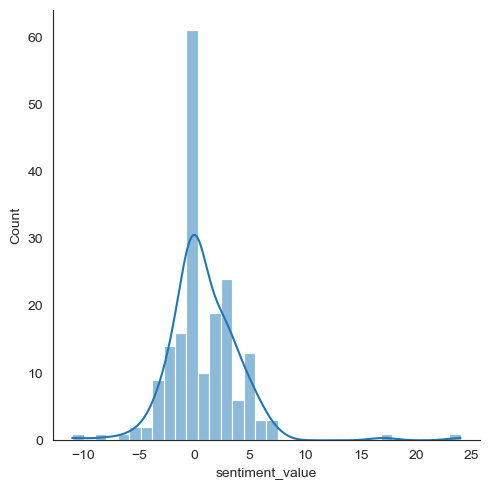

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

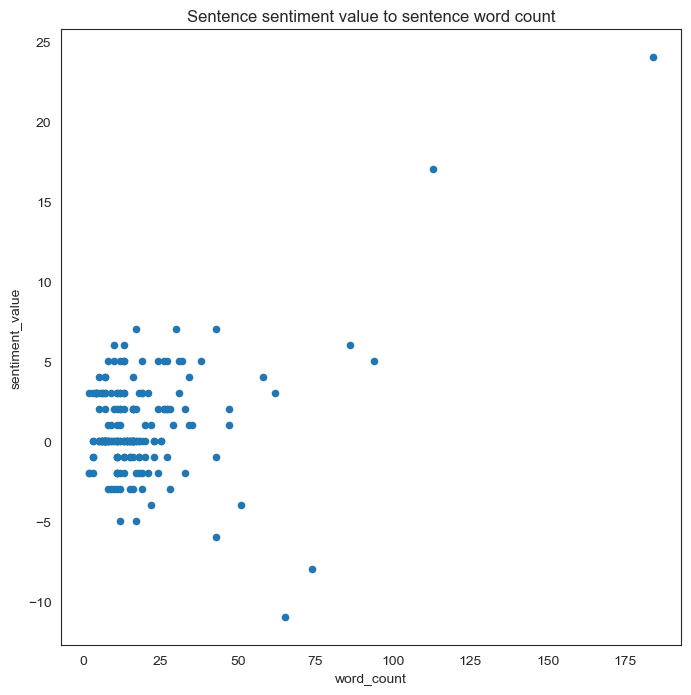

In [50]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')